In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [2]:
diabetes_df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

diabetes_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [3]:
diabetes_df.shape

(70692, 22)

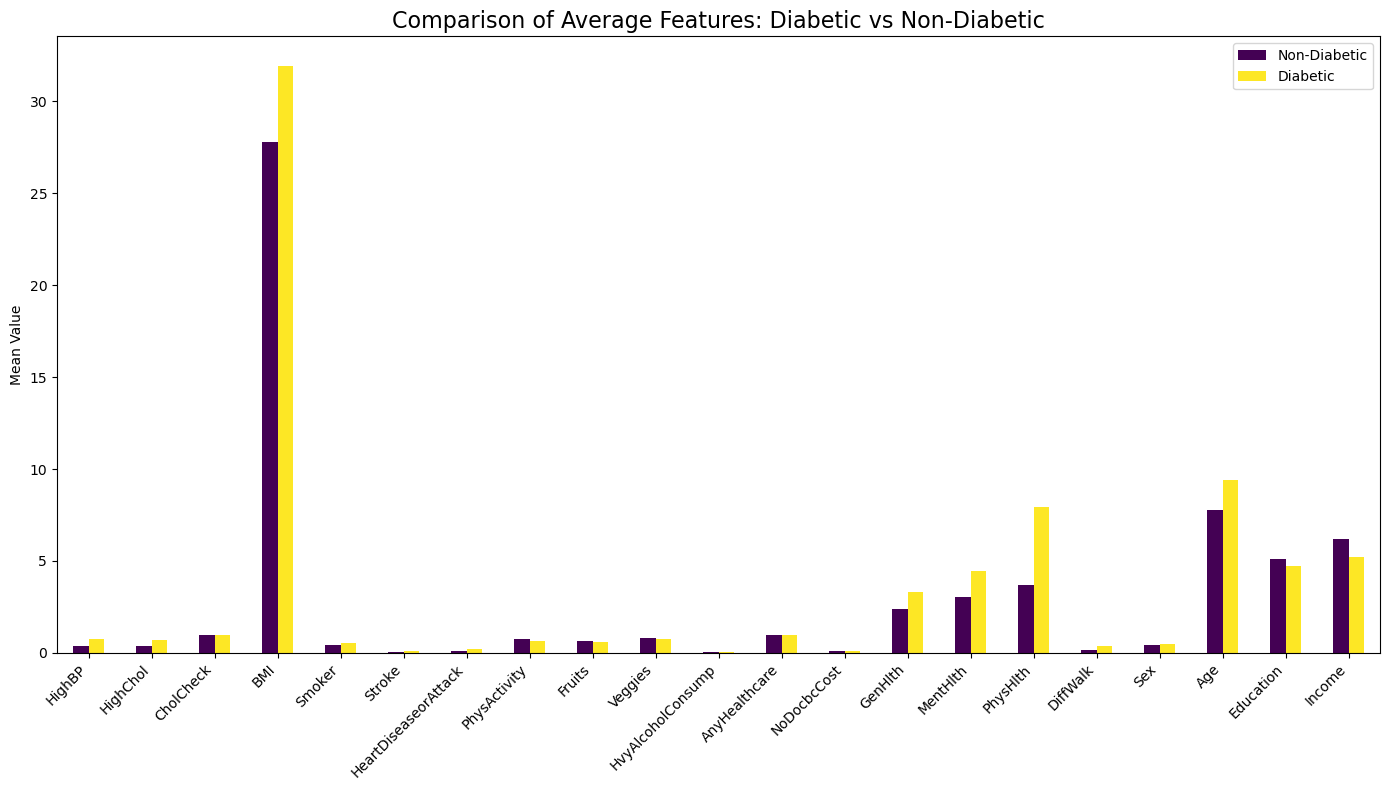

In [39]:
correlation_matrix = diabetes_df.corr()
grouped_means = diabetes_df.groupby('Diabetes_binary').mean().T
grouped_means.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Comparison of Average Features: Diabetic vs Non-Diabetic', fontsize=16)
plt.ylabel('Mean Value')
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend(["Non-Diabetic", "Diabetic"], loc='upper right')
plt.tight_layout()
plt.show()

In [5]:
diabetes_df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
X = diabetes_df.drop('Diabetes_binary', axis=1)
y = diabetes_df['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [27]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7484970648560718
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7090
         1.0       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Confusion Matrix:
 [[5156 1934]
 [1622 5427]]


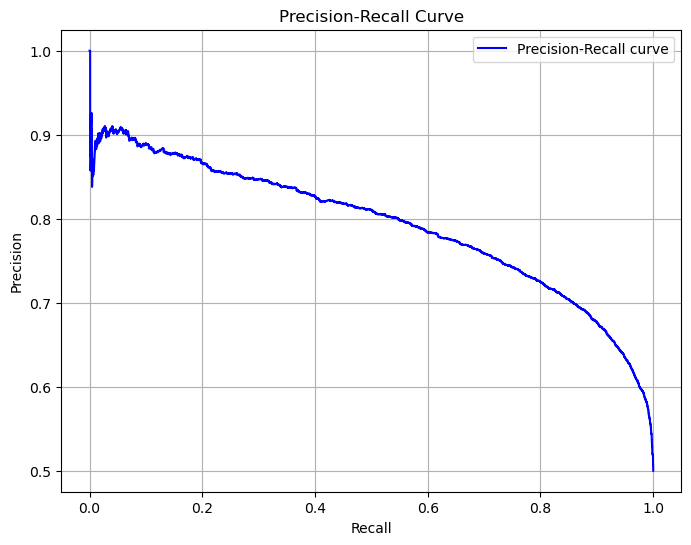

In [49]:
y_prob = logistic_model.predict_proba(X_test)[:, 1] 

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [45]:
coefficients = logistic_model.coef_[0]
odds_ratios = np.exp(coefficients)
feature_names = X_train.columns  # Feature names
coefficients_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Odds Ratio": odds_ratios
})

coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)
print("\nFeature Importance (Coefficients and Odds Ratios):\n", coefficients_df)


Feature Importance (Coefficients and Odds Ratios):
                  Feature  Coefficient  Odds Ratio
2              CholCheck     1.313257    3.718266
10     HvyAlcoholConsump    -0.754390    0.470298
0                 HighBP     0.742139    2.100424
13               GenHlth     0.590270    1.804476
1               HighChol     0.573744    1.774900
17                   Sex     0.263525    1.301510
6   HeartDiseaseorAttack     0.253392    1.288389
18                   Age     0.152657    1.164925
5                 Stroke     0.150390    1.162287
16              DiffWalk     0.127923    1.136465
9                Veggies    -0.088201    0.915576
3                    BMI     0.074409    1.077248
20                Income    -0.058667    0.943021
8                 Fruits    -0.052643    0.948719
11         AnyHealthcare     0.040124    1.040940
19             Education    -0.027959    0.972429
12           NoDocbcCost     0.027945    1.028339
7           PhysActivity    -0.024953    0.9753

### Gradient Boosting

Best Parameters: {'learning_rate': 0.07, 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 400}
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      7070
         1.0       0.73      0.80      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139

Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      7070
         1.0       0.73      0.80      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139



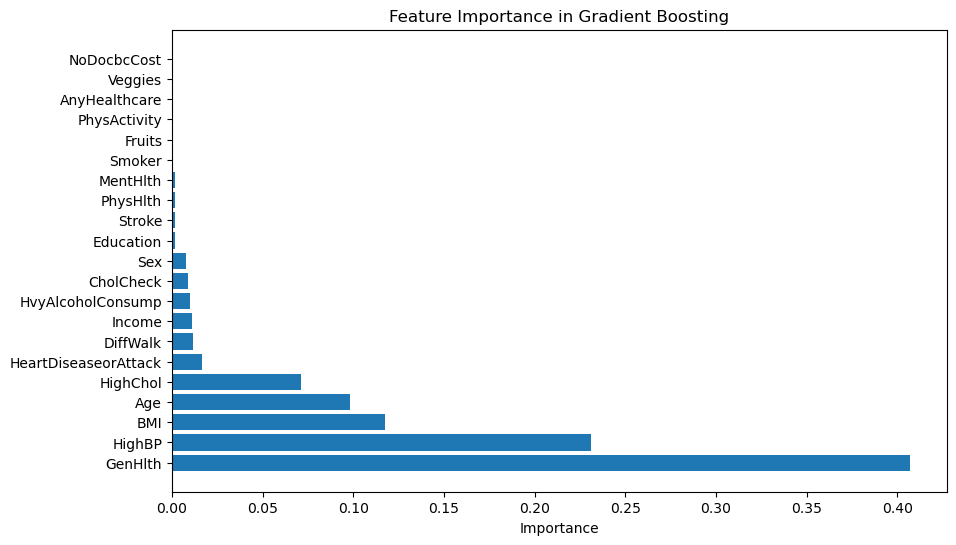

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

gb_model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [400, 500, 600, 700],  
    'learning_rate': [0.03, 0.05, 0.07],  
    'max_depth': [3, 4, 5],  
    'min_samples_split': [4, 5, 8]  
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_

y_pred = best_gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print("Best Parameters:", grid_search.best_params_)

report = classification_report(y_test, y_pred)

importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Gradient Boosting')
plt.show()

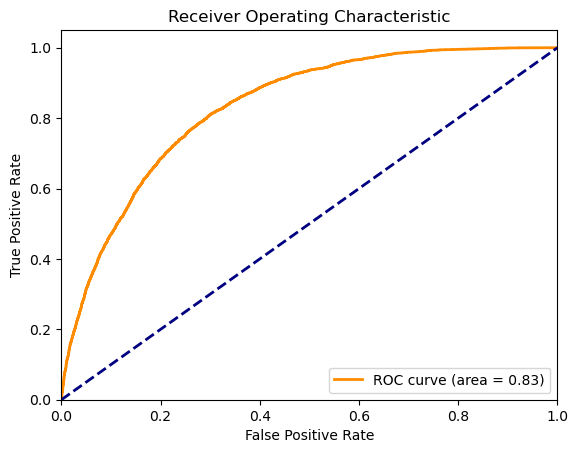

In [79]:
y_prob = best_gb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()